In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from IPython.display import Image

import boto3
import logging

boto3.set_stream_logger(name="botocore.credentials", level=logging.WARNING)

<IPython.core.display.Javascript object>

#### Iris Dataset

In [4]:
Image(url="images/iris_1.png", width=800)  # , height=300)

<IPython.core.display.Javascript object>

In [5]:
Image(url="images/iris_2.svg", width=800)  # , height=300)

<IPython.core.display.Javascript object>

In [6]:
Image(url="images/iris_3.png", height=400)

<IPython.core.display.Javascript object>

In [7]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

<IPython.core.display.Javascript object>

In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

<IPython.core.display.Javascript object>

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<IPython.core.display.Javascript object>

In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["class"] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<IPython.core.display.Javascript object>

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<IPython.core.display.Javascript object>

In [12]:
print(df.shape)

(150, 5)


<IPython.core.display.Javascript object>

In [13]:
df["class"].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
cols = list(df.columns)
print(cols)
cols = [cols[-1]] + cols[:-1]
print(cols)
df = df[cols]
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
['class', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>

#### Train - Test split

In [15]:
train_df, test_df = train_test_split(
    df, test_size=0.33, random_state=42, stratify=df["class"]
)

<IPython.core.display.Javascript object>

In [16]:
train_df["class"].value_counts()

0    34
2    33
1    33
Name: class, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
test_df["class"].value_counts()

2    17
1    17
0    16
Name: class, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
train_df.to_csv("data/iris_train.csv", index=False, header=None)

<IPython.core.display.Javascript object>

In [19]:
test_df.to_csv("data/iris_test.csv", index=False, header=None)

<IPython.core.display.Javascript object>

In [20]:
infer_df = test_df.drop(columns=["class"])
infer_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
7,5.0,3.4,1.5,0.2
67,5.8,2.7,4.1,1.0
107,7.3,2.9,6.3,1.8


<IPython.core.display.Javascript object>

In [21]:
infer_df.to_csv("data/iris_infer.csv", index=False, header=None)

<IPython.core.display.Javascript object>

In [22]:
!head data/iris_train.csv

2,6.3,3.4,5.6,2.4
0,5.1,3.5,1.4,0.3
2,5.8,2.7,5.1,1.9
1,5.2,2.7,3.9,1.4
0,4.6,3.4,1.4,0.3
0,5.2,4.1,1.5,0.1
0,5.7,4.4,1.5,0.4
2,6.4,3.1,5.5,1.8
0,4.8,3.1,1.6,0.2
0,4.9,3.1,1.5,0.2


<IPython.core.display.Javascript object>

In [23]:
!head data/iris_infer.csv

6.3,2.8,5.1,1.5
6.3,3.3,4.7,1.6
5.0,3.4,1.5,0.2
5.8,2.7,4.1,1.0
7.3,2.9,6.3,1.8
4.9,2.4,3.3,1.0
5.7,2.8,4.5,1.3
5.7,3.8,1.7,0.3
5.6,3.0,4.5,1.5
5.5,2.3,4.0,1.3


<IPython.core.display.Javascript object>

In [24]:
!aws s3 cp data/iris_train.csv s3://sgmkr-course/iris/data/

upload: data/iris_train.csv to s3://sgmkr-course/iris/data/iris_train.csv


<IPython.core.display.Javascript object>

In [25]:
!aws s3 cp data/iris_test.csv s3://sgmkr-course/iris/data/

upload: data/iris_test.csv to s3://sgmkr-course/iris/data/iris_test.csv


<IPython.core.display.Javascript object>

In [26]:
!aws s3 cp data/iris_infer.csv s3://sgmkr-course/iris/batch_transform/

upload: data/iris_infer.csv to s3://sgmkr-course/iris/batch_transform/iris_infer.csv


<IPython.core.display.Javascript object>

In [27]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

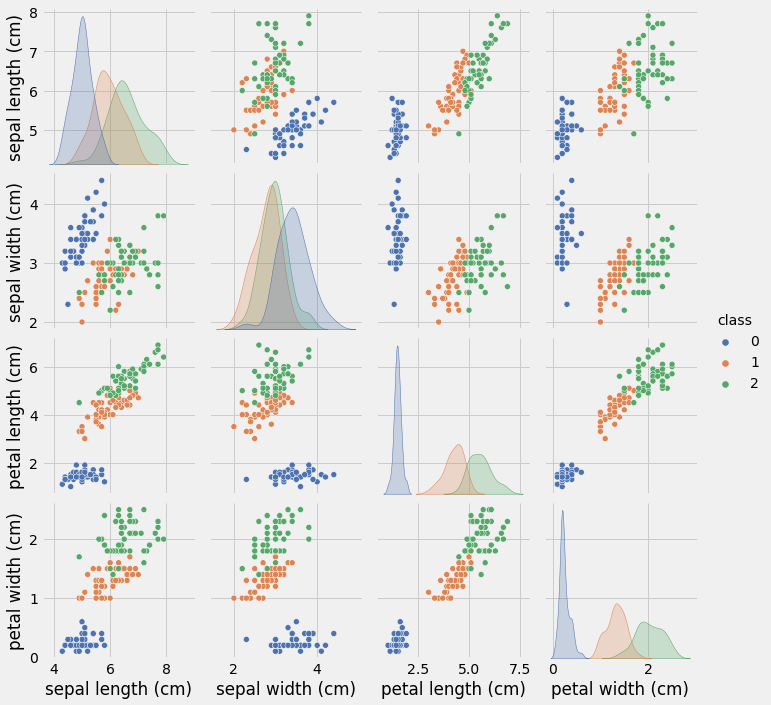

<IPython.core.display.Javascript object>

In [28]:
sb.pairplot(df, hue="class", palette="deep")
plt.show()